In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

# EN3150 – Assignment 01

## Learning from data and related challenges and linear models for regression

Name: Balasooriya BAPI

Index No: 220054N

### 1. Linear Regression Impact on Outliers
#### 1.1 Loading the Dataset

| i | $x_i$ | $y_i$ |
|---|---|---|
| 1 | 0 | 20.26 |
| 2 | 1 | 5.61 |
| 3 | 2 | 3.14 |
| 4 | 3 | -30.00 |
| 5 | 4 | -40.00 |
| 6 | 5 | -8.13 |
| 7 | 6 | -11.73 |
| 8 | 7 | -16.08 |
| 9 | 8 | -19.95 |
| 10 | 9 | -24.03 |

In [10]:
x = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([20.26,5.61,3.14,-30.0,-40.0,-8.13,-11.73,-16.08,-19.95,-24.03])

df = pd.DataFrame({'x':x, 'y':y})
df

,x,y
0,0,20.26
1,1,5.61
2,2,3.14
3,3,-30.00
4,4,-40.00
5,5,-8.13
6,6,-11.73
7,7,-16.08
8,8,-19.95
9,9,-24.03


#### 1.1.1 Visualizing the dataset

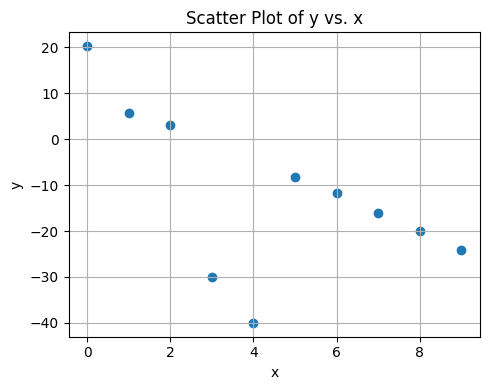

In [11]:
# Create the scatter plot
plt.figure(figsize=(5, 4))
plt.scatter(df['x'], df['y'])
plt.title('Scatter Plot of y vs. x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.tight_layout()
# plt.savefig('scatter_plot.png')

#### 1.2 Linear Regression Model

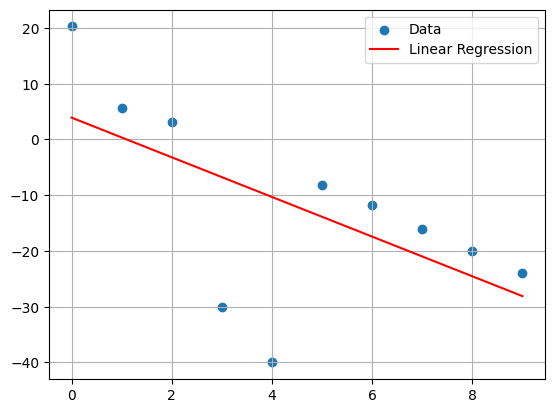

Regression model: y = -3.557x + 3.917


In [12]:
model = LinearRegression()
model.fit(x.reshape(-1,1), y)

slope = model.coef_[0]
intercept = model.intercept_

plt.scatter(x,y,label="Data")
plt.plot(x, model.predict(x.reshape(-1,1)), color="red", label="Linear Regression")
plt.legend()
plt.grid(True)
plt.show()

print(f"Regression model: y = {slope:.3f}x + {intercept:.3f}")

#### 1.3 Robust Estimator

In [12]:
def robust_loss(y_true, y_pred, beta):
    errors = y_true - y_pred
    return np.mean((errors**2) / (errors**2 + beta**2))


# Models
def model1(x): return -4*x + 12
def model2(x): return -3.55*x + 3.91

#### 1.4 Calculating loss function

In [17]:
betas = [1, 1e-6, 1e3]
print("Robust Loss for different models:")

for beta in betas:
    L1 = robust_loss(y, model1(x), beta)
    L2 = robust_loss(y, model2(x), beta)
    print(f"β={beta}: Model1={L1:.8f}, Model2={L2:.8f}")

Robust Loss for different models:
β=1: Model1=0.43541626, Model2=0.97284705
β=1e-06: Model1=1.00000000, Model2=1.00000000
β=1000.0: Model1=0.00022683, Model2=0.00018825


#### 1.5 Selecting $\beta$ value

From the robust loss calculations:

| β value   | Model 1 Loss | Model 2 Loss |
|-----------|--------------|--------------|
| **1**     | 0.4354       | 0.9728       |
| **1e-6**  | 1.0000       | 1.0000       |
| **1000**  | 0.0002268    | 0.0001883    |

**Explanation:**  
- When **β = 1e-6**, the loss is 1.0 for both models. This means the estimator is almost identical to squared error loss, making it **highly sensitive to outliers**. Thus, outliers dominate the loss and distort model evaluation.  
- When **β = 1000**, the loss values are nearly zero. This shows that the estimator **ignores almost all errors, including valid ones**, which removes outlier influence but also reduces sensitivity to the majority of normal data points.  
- When **β = 1**, the estimator provides a **balanced trade-off**:  
  - Outliers are down-weighted (their errors do not dominate the loss).  
  - Normal data points still contribute meaningfully to the evaluation.  
  - The loss function differentiates between the two models, allowing model comparison.  

**Therefore, β = 1 is the most suitable value** to mitigate the effect of outliers while still capturing useful information from the dataset.  



#### 1.6 Selecting the most suitable model

Using the robust loss function with **β = 1**, we obtained:  

| Model     | Robust Loss (β=1) |
|-----------|-------------------|
| **Model 1** (y = -4x + 12)   | 0.4354 |
| **Model 2** (y = -3.55x + 3.91) | 0.9728 |

**Analysis:**  
- The robust loss of **Model 1 is lower (0.4354)** compared to Model 2 (0.9728).  
- This indicates that, when outliers are down-weighted, **Model 1 fits the dataset better** than Model 2.  
- Model 2 was the ordinary least squares (OLS) regression fit. Since OLS is highly sensitive to outliers, it performs worse under the robust estimator.  
- Model 1, despite not being the direct OLS fit, provides a better balance because its parameters are less influenced by the extreme outlier values.  

**Conclusion:** With the robust estimator (β=1), **Model 1 (y = -4x + 12) is the most suitable model** for the given dataset.  


#### 1.7 How the Robust Estimator Reduces the Impact of Outliers  

The robust estimator modifies the error contribution of each data point by using the loss function:  

$L(\theta, \beta) = \frac{1}{N} \sum_{i=1}^N \frac{(y_i - \hat{y}_i)^2}{(y_i - \hat{y}_i)^2 + \beta^2}$

**Explanation:**  
- In ordinary least squares (OLS), the squared error grows very large for outliers, which heavily influences the fitted model.  
- In the robust estimator, when the error \((y_i - \hat{y}_i)^2\) is **small**, the fraction is close to 1, meaning these points contribute normally to the loss.  
- When the error is **very large** (as with outliers), the denominator dominates, and the fraction approaches 1 (saturates). Thus, the contribution of extreme errors is **capped** instead of growing indefinitely.  
- This prevents a few extreme outliers from dominating the regression fitting process.  

**In summary:** The robust estimator reduces the impact of outliers by *down-weighting their contribution* to the overall loss, ensuring that the majority of "normal" data points drive the learning process.  


### 1.8 Alternative Loss Function for Robust Estimation  

An alternative loss function that can be used in robust estimation is the **Huber Loss**.  

The Huber Loss is defined as:  

$$
L_\delta(y, \hat{y}) =
\begin{cases} 
\frac{1}{2}(y - \hat{y})^2 & \text{for } |y - \hat{y}| \leq \delta \\
\delta \cdot (|y - \hat{y}| - \frac{1}{2}\delta) & \text{for } |y - \hat{y}| > \delta
\end{cases}
$$

**Explanation:** - For **small errors** $(|y - \hat{y}| \leq \delta)$, it behaves like **MSE**, giving a quadratic penalty.  
- For **large errors** $(|y - \hat{y}| > \delta)$, it behaves like **MAE (Mean Absolute Error)**, giving a linear penalty.  
- This makes the Huber Loss less sensitive to outliers compared to pure MSE, while still being differentiable and efficient for optimization.  

**In summary:** The Huber Loss combines the strengths of MSE (for normal data) and MAE (for outliers), making it a widely used alternative for robust regression.

### 2. Loss Function

#### 2.1. MSE and BCE Loss functions

In [18]:
def mse(y, yhat):
    return (y - yhat)**2

def bce(y, yhat):
    return -(y*np.log(yhat) + (1-y)*np.log(1-yhat))

preds = [0.005,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
results = []

for yhat in preds:
    results.append([1, yhat, mse(1,yhat), bce(1,yhat)])

df2 = pd.DataFrame(results, columns=["y","y_hat","MSE","BCE"])
df2


/tmp/ipykernel_18075/1198832475.py:5: RuntimeWarning: divide by zero encountered in log
  return -(y*np.log(yhat) + (1-y)*np.log(1-yhat))
/tmp/ipykernel_18075/1198832475.py:5: RuntimeWarning: invalid value encountered in scalar multiply
  return -(y*np.log(yhat) + (1-y)*np.log(1-yhat))


,y,y_hat,MSE,BCE
0,1,0.005,0.990025,5.298317
1,1,0.010,0.980100,4.605170
2,1,0.050,0.902500,2.995732
3,1,0.100,0.810000,2.302585
4,1,0.200,0.640000,1.609438
5,1,0.300,0.490000,1.203973
6,1,0.400,0.360000,0.916291
7,1,0.500,0.250000,0.693147
8,1,0.600,0.160000,0.510826
9,1,0.700,0.090000,0.356675


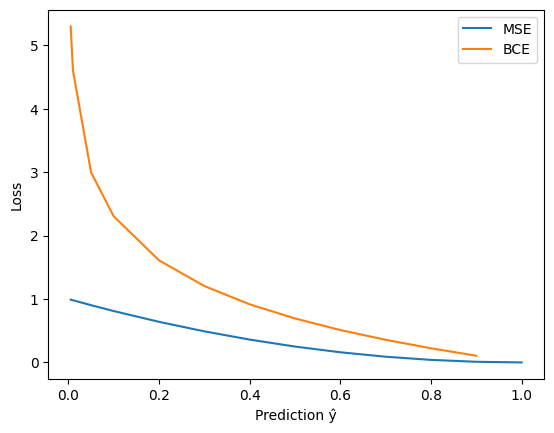

In [19]:
plt.plot(preds, df2["MSE"], label="MSE")
plt.plot(preds, df2["BCE"], label="BCE")
plt.xlabel("Prediction ŷ")
plt.ylabel("Loss")
plt.legend()
plt.show()


Justification:
1. Nature of problem: Continuous target values require regression
2. MSE properties:
   - Differentiable everywhere (good for gradient-based optimization)
   - Penalizes large errors more heavily (quadratic penalty)
   - Well-suited for normally distributed errors
   - Provides unique global minimum for linear models
3. Mathematical convenience: Easy to optimize analytically

APPLICATION 2 - Binary Dependent Variable (0 or 1):
Selected Loss Function: Binary Cross Entropy (BCE)

Justification:
1. Nature of problem: Binary classification requires probability estimates
2. BCE properties:
   - Designed specifically for binary classification
   - Outputs interpretable probabilities (0 to 1 range)
   - Heavily penalizes confident wrong predictions (log penalty)
   - Convex function ensures global optimum
   - Natural choice for maximum likelihood estimation
3. Theoretical foundation: Derived from likelihood principle for Bernoulli distribution

KEY DIFFERENCES:
- MSE grows quadratically with error magnitude
- BCE grows logarithmically, heavily penalizing predictions near 0 when true label is 1
- BCE naturally handles probability distributions, MSE does not

### 3. Data Pre-Processing


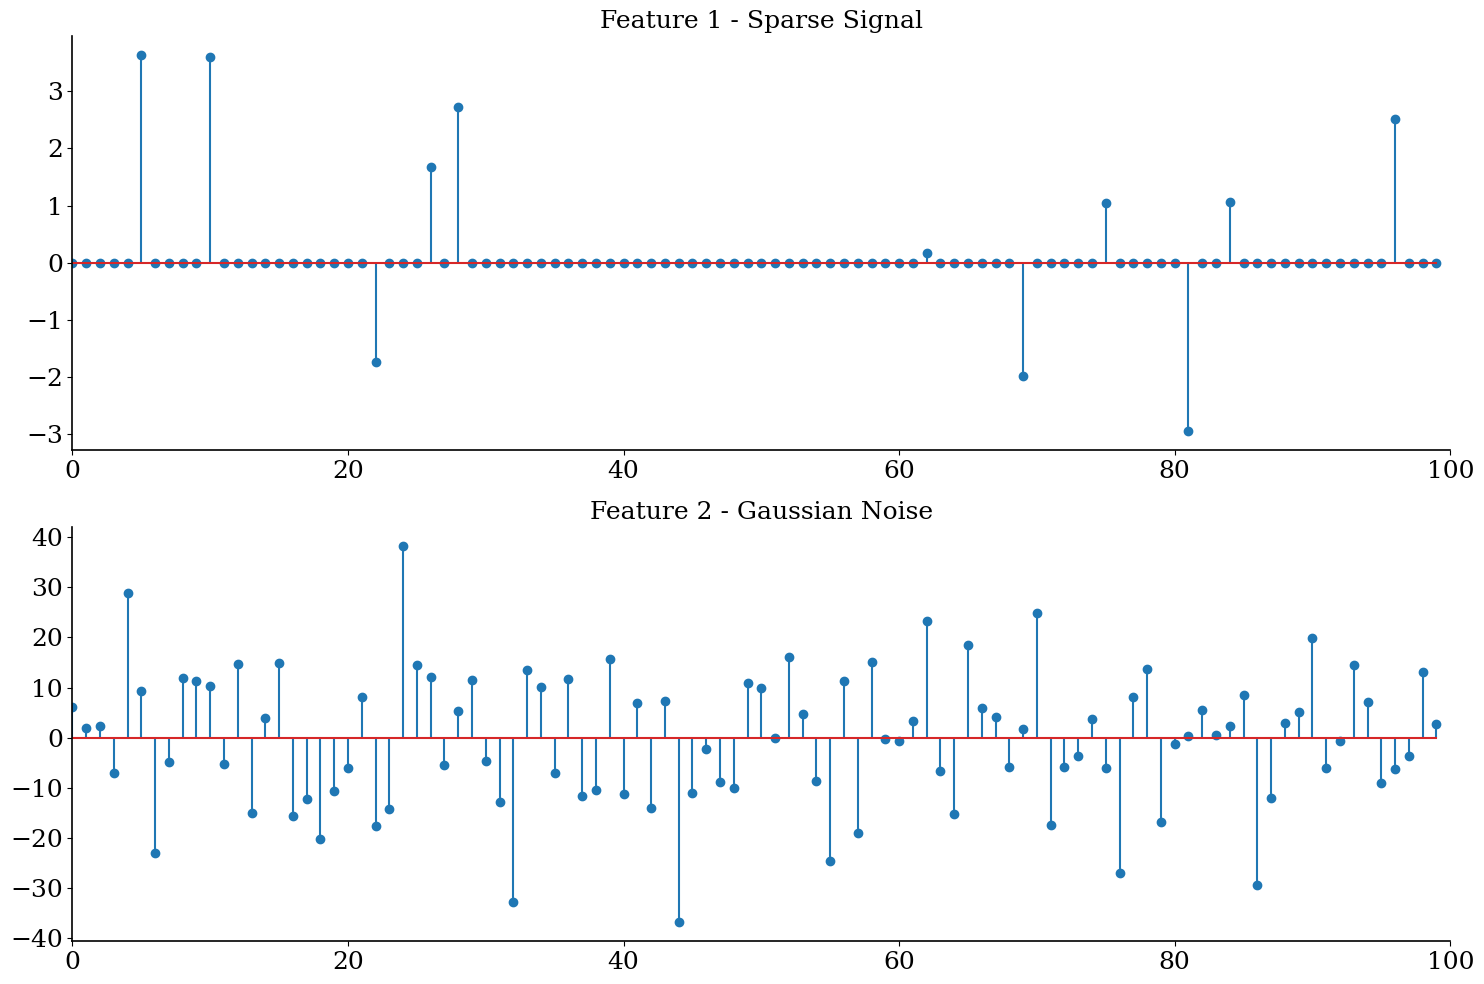

Feature Analysis:
Feature 1 (Sparse Signal):
  Mean: 0.0975
  Std: 0.7718
  Min: -2.9489
  Max: 3.6294
  Sparsity: 11/100 non-zero elements

Feature 2 (Gaussian Noise):
  Mean: -0.2766
  Std: 13.4472
  Min: -36.8348
  Max: 38.1993


In [11]:

def generate_signal(signal_length, num_nonzero):
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 10 * np.random.randn(num_nonzero)
    signal[nonzero_indices] = nonzero_values
    return signal

# Set parameters
signal_length = 100
num_nonzero = 10
your_index_no = 220054

# Set random seed for reproducibility
# np.random.seed(42)

# Generate sparse signal (Feature 1)
sparse_signal = generate_signal(signal_length, num_nonzero)
sparse_signal[10] = (your_index_no % 10) * 2 + 10
if your_index_no % 10 == 0:
    sparse_signal[10] = np.random.randn(1) + 30
sparse_signal = sparse_signal / 5

# Generate noise signal (Feature 2)
epsilon = np.random.normal(0, 15, signal_length)

# Plot original features
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.xlim(0, signal_length)
plt.title("Feature 1 - Sparse Signal", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.stem(sparse_signal)

plt.subplot(2, 1, 2)
plt.xlim(0, signal_length)
plt.title("Feature 2 - Gaussian Noise", fontsize=18)
plt.stem(epsilon)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.tight_layout()
plt.show()

# Analyze feature properties
print("Feature Analysis:")
print("=" * 30)
print(f"Feature 1 (Sparse Signal):")
print(f"  Mean: {np.mean(sparse_signal):.4f}")
print(f"  Std: {np.std(sparse_signal):.4f}")
print(f"  Min: {np.min(sparse_signal):.4f}")
print(f"  Max: {np.max(sparse_signal):.4f}")
print(f"  Sparsity: {np.sum(sparse_signal != 0)}/{len(sparse_signal)} non-zero elements")

print(f"\nFeature 2 (Gaussian Noise):")
print(f"  Mean: {np.mean(epsilon):.4f}")
print(f"  Std: {np.std(epsilon):.4f}")
print(f"  Min: {np.min(epsilon):.4f}")
print(f"  Max: {np.max(epsilon):.4f}")

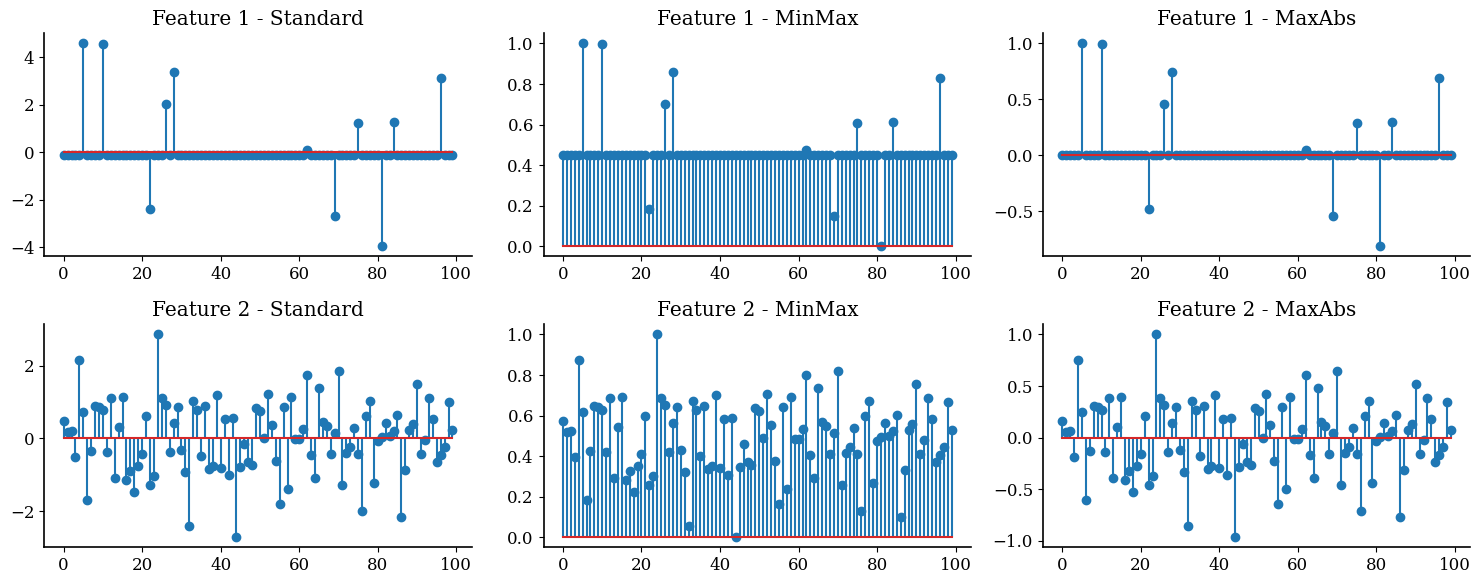

In [ ]:
f1 = sparse_signal.reshape(-1,1)
f2 = epsilon.reshape(-1,1)

scalers = {
    "Standard": StandardScaler(),
    "MinMax": MinMaxScaler(),
    "MaxAbs": MaxAbsScaler()
}

fig, axes = plt.subplots(2, 3, figsize=(15, 6))  # 2 rows, 3 columns

# Feature 1 (row 0)
for col, (name, scaler) in enumerate(scalers.items()):
    scaled_f1 = scaler.fit_transform(f1)
    axes[0, col].stem(scaled_f1)
    axes[0, col].set_title(f"Feature 1 - {name}")

# Feature 2 (row 1)
for col, (name, scaler) in enumerate(scalers.items()):
    scaled_f2 = scaler.fit_transform(f2)
    axes[1, col].stem(scaled_f2)
    axes[1, col].set_title(f"Feature 2 - {name}")

plt.tight_layout()
plt.show()


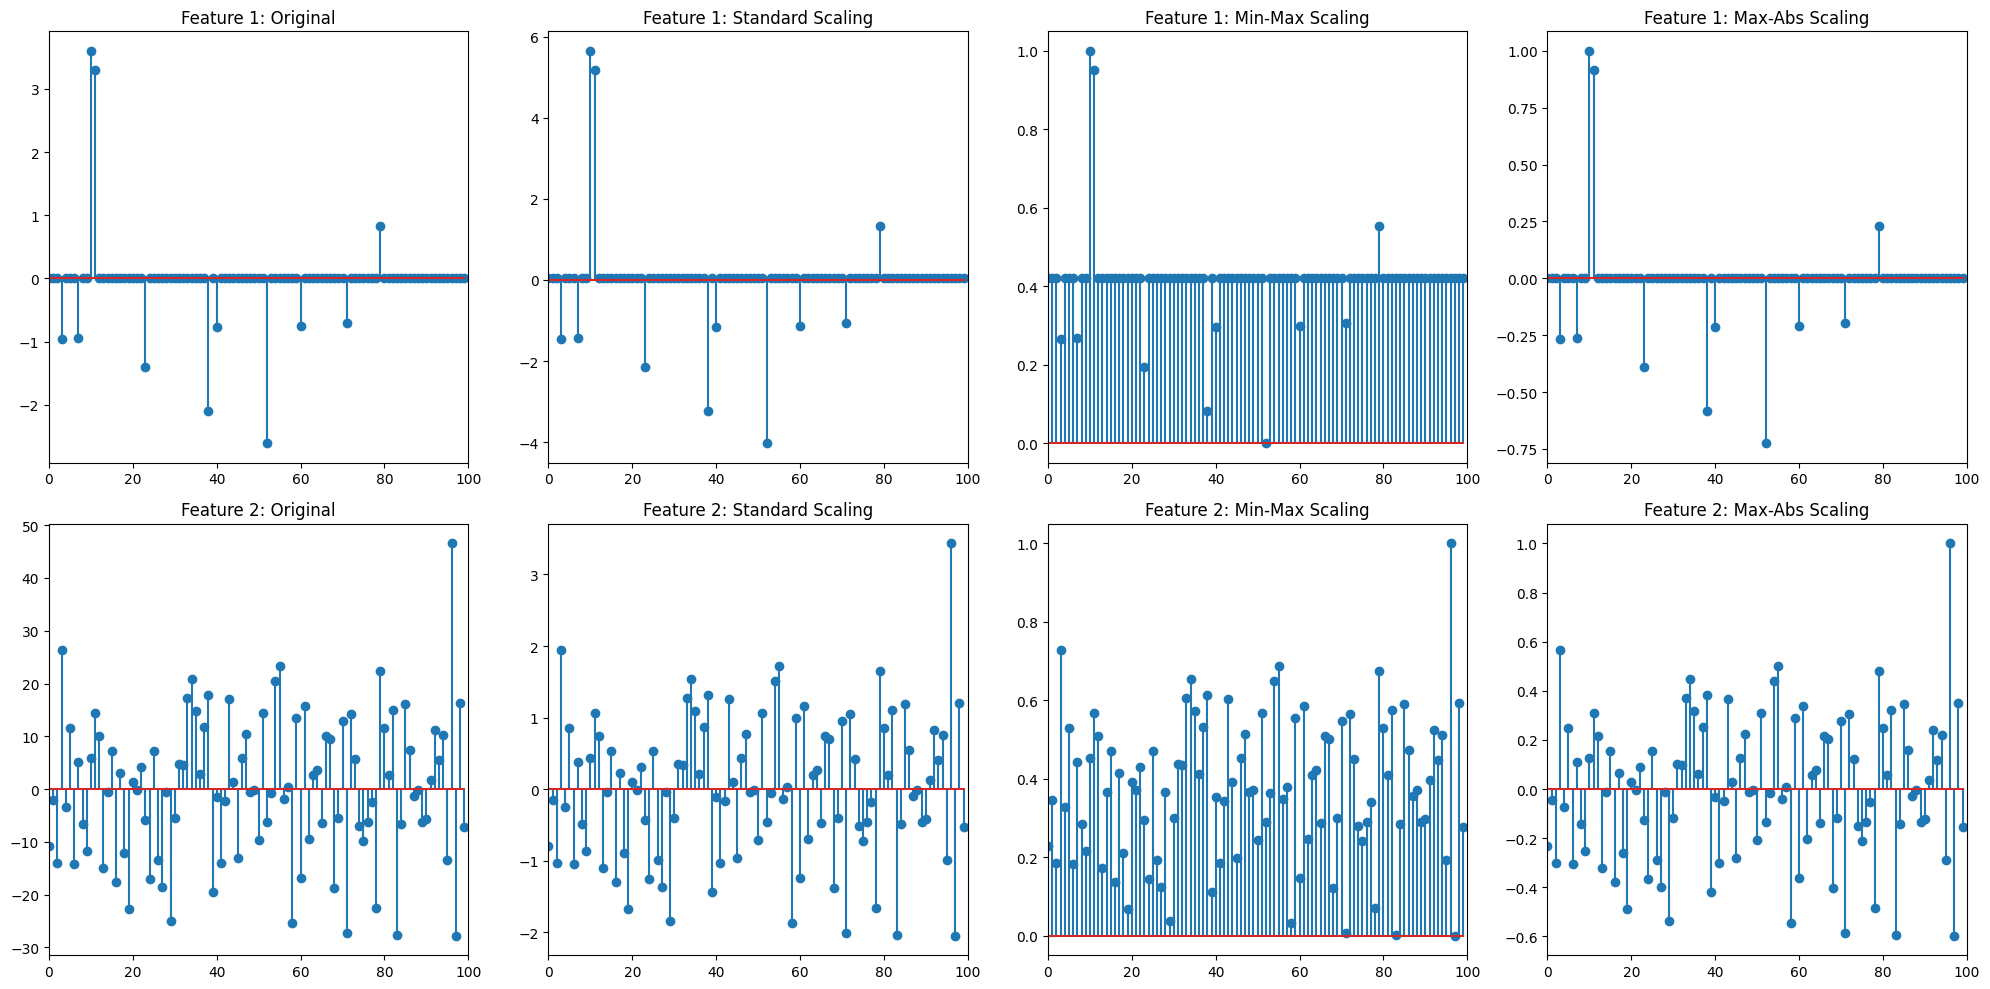

Scaling Methods Statistical Comparison:
     Feature Scaling Method    Mean      Std      Min      Max
0  Feature 1       Original -0.0254   0.6416  -2.6092   3.6000
1  Feature 1       Standard  0.0000   1.0000  -4.0270   5.6505
2  Feature 1        Min-Max  0.4161   0.1033   0.0000   1.0000
3  Feature 1        Max-Abs -0.0071   0.1782  -0.7248   1.0000
4  Feature 2       Original -0.0100  13.5547 -27.7738  46.5349
5  Feature 2       Standard  0.0000   1.0000  -2.0483   3.4339
6  Feature 2        Min-Max  0.3736   0.1824   0.0000   1.0000
7  Feature 2        Max-Abs -0.0002   0.2913  -0.5968   1.0000


In [7]:
# Apply different scaling methods
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
maxabs_scaler = MaxAbsScaler()

# Reshape for sklearn scalers
feature1_reshaped = sparse_signal.reshape(-1, 1)
feature2_reshaped = epsilon.reshape(-1, 1)

# Apply scaling methods to Feature 1
feature1_standard = standard_scaler.fit_transform(feature1_reshaped).flatten()
feature1_minmax = minmax_scaler.fit_transform(feature1_reshaped).flatten()
feature1_maxabs = maxabs_scaler.fit_transform(feature1_reshaped).flatten()

# Apply scaling methods to Feature 2
feature2_standard = standard_scaler.fit_transform(feature2_reshaped).flatten()
feature2_minmax = minmax_scaler.fit_transform(feature2_reshaped).flatten()
feature2_maxabs = maxabs_scaler.fit_transform(feature2_reshaped).flatten()

# Visualize scaling effects on Feature 1
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Feature 1 plots
axes[0, 0].stem(sparse_signal)
axes[0, 0].set_title('Feature 1: Original')
axes[0, 0].set_xlim(0, signal_length)

axes[0, 1].stem(feature1_standard)
axes[0, 1].set_title('Feature 1: Standard Scaling')
axes[0, 1].set_xlim(0, signal_length)

axes[0, 2].stem(feature1_minmax)
axes[0, 2].set_title('Feature 1: Min-Max Scaling')
axes[0, 2].set_xlim(0, signal_length)

axes[0, 3].stem(feature1_maxabs)
axes[0, 3].set_title('Feature 1: Max-Abs Scaling')
axes[0, 3].set_xlim(0, signal_length)

# Feature 2 plots
axes[1, 0].stem(epsilon)
axes[1, 0].set_title('Feature 2: Original')
axes[1, 0].set_xlim(0, signal_length)

axes[1, 1].stem(feature2_standard)
axes[1, 1].set_title('Feature 2: Standard Scaling')
axes[1, 1].set_xlim(0, signal_length)

axes[1, 2].stem(feature2_minmax)
axes[1, 2].set_title('Feature 2: Min-Max Scaling')
axes[1, 2].set_xlim(0, signal_length)

axes[1, 3].stem(feature2_maxabs)
axes[1, 3].set_title('Feature 2: Max-Abs Scaling')
axes[1, 3].set_xlim(0, signal_length)

plt.tight_layout()
plt.show()

# Statistical analysis of scaled features
scaling_stats = pd.DataFrame({
    'Feature': ['Feature 1'] * 4 + ['Feature 2'] * 4,
    'Scaling Method': ['Original', 'Standard', 'Min-Max', 'Max-Abs'] * 2,
    'Mean': [
        np.mean(sparse_signal), np.mean(feature1_standard), 
        np.mean(feature1_minmax), np.mean(feature1_maxabs),
        np.mean(epsilon), np.mean(feature2_standard),
        np.mean(feature2_minmax), np.mean(feature2_maxabs)
    ],
    'Std': [
        np.std(sparse_signal), np.std(feature1_standard),
        np.std(feature1_minmax), np.std(feature1_maxabs),
        np.std(epsilon), np.std(feature2_standard),
        np.std(feature2_minmax), np.std(feature2_maxabs)
    ],
    'Min': [
        np.min(sparse_signal), np.min(feature1_standard),
        np.min(feature1_minmax), np.min(feature1_maxabs),
        np.min(epsilon), np.min(feature2_standard),
        np.min(feature2_minmax), np.min(feature2_maxabs)
    ],
    'Max': [
        np.max(sparse_signal), np.max(feature1_standard),
        np.max(feature1_minmax), np.max(feature1_maxabs),
        np.max(epsilon), np.max(feature2_standard),
        np.max(feature2_minmax), np.max(feature2_maxabs)
    ]
})

print("Scaling Methods Statistical Comparison:")
print(scaling_stats.round(4))